In [1]:
!rm -rf /kaggle/working/DINO
!git clone https://github.com/aditdesai/DINO.git

Cloning into 'DINO'...
remote: Enumerating objects: 738, done.
remote: Counting objects: 100% (491/491), done.
remote: Compressing objects: 100% (353/353), done.
remote: Total 738 (delta 192), reused 371 (delta 131), pack-reused 247 (from 1)
Receiving objects: 100% (738/738), 38.38 MiB | 36.39 MiB/s, done.
Resolving deltas: 100% (248/248), done.


In [2]:
!conda install -c pytorch pytorch torchvision -y

Channels:
 - pytorch
 - rapidsai
 - nvidia
 - nodefaults
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: done

# All requested packages already installed.



In [3]:
%cd DINO
!pip install -r requirements.txt

/kaggle/working/DINO
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-install-9n2stuah/pycocotools_74e63fed59bf4aa38667ef76321b18a6
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-install-9n2stuah/pycocotools_74e63fed59bf4aa38667ef76321b18a6
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/cocodataset/panopticapi.git to /tmp/pip-install-9n2stuah/panopticapi_bbb35d81e1334c73b0f5af63bf4d2f01
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/panopticapi.git /tmp/pip-install-9n2stuah/panopticapi_bbb35d81e1334c73b0f5af63bf4d2f01
  Resolved https://github.com/cocodataset/panopticapi.git to commit 7bb4655548f98f3fedc07bf37e9040a992b054b0
  Preparing metadata (setup.py) ... done


In [4]:
%cd models/dino/ops
!python setup.py build install
!python test.py
%cd ../../..

/kaggle/working/DINO/models/dino/ops
/opt/conda/lib/python3.10/site-packages/torch/utils/cpp_extension.py:414: UserWarning: The detected CUDA version (12.3) has a minor version mismatch with the version that was used to compile PyTorch (12.4). Most likely this shouldn't be a problem.
  warnings.warn(CUDA_MISMATCH_WARN.format(cuda_str_version, torch.version.cuda))
/opt/conda/lib/python3.10/site-packages/torch/utils/cpp_extension.py:424: UserWarning: There are no g++ version bounds defined for CUDA version 12.3
  warnings.warn(f'There are no {compiler_name} version bounds defined for CUDA version {cuda_str_version}')
/opt/conda/lib/python3.10/site-packages/torch/utils/cpp_extension.py:1965: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Emitting ninja build file /kaggle/working/DINO/models/dino/ops/build/temp.linux-x86_64-cpython-310/build.ninj

In [5]:
pip install numpy==1.23.5 yapf==0.40.1

Note: you may need to restart the kernel to use updated packages.


In [6]:
!bash /kaggle/working/DINO/scripts/DINO_eval.sh /kaggle/input/pedestrians/dataset /kaggle/input/dino-model/checkpoint0033_4scale.pth

Not using distributed mode
Loading config file from config/DINO/DINO_4scale.py
[09/24 08:04:44.269]: git:
  sha: 659dfc51121b34356681f73f725af2d2e64b9aab, status: clean, branch: main

[09/24 08:04:44.269]: Command: main.py --output_dir logs/DINO/R50-MS4-%j -c config/DINO/DINO_4scale.py --coco_path /kaggle/input/pedestrians/dataset --eval --resume /kaggle/input/dino-model/checkpoint0033_4scale.pth --options dn_scalar=100 embed_init_tgt=TRUE dn_label_coef=1.0 dn_bbox_coef=1.0 use_ema=False dn_box_noise_scale=1.0
[09/24 08:04:44.270]: Full config saved to logs/DINO/R50-MS4-%j/config_args_all.json
[09/24 08:04:44.270]: world size: 1
[09/24 08:04:44.270]: rank: 0
[09/24 08:04:44.270]: local_rank: 0
[09/24 08:04:44.270]: args: Namespace(config_file='config/DINO/DINO_4scale.py', options={'dn_scalar': 100, 'embed_init_tgt': True, 'dn_label_coef': 1.0, 'dn_bbox_coef': 1.0, 'use_ema': False, 'dn_box_noise_scale': 1.0}, dataset_file='coco', coco_path='/kaggle/input/pedestrians/dataset', coco_pano

In [7]:
import os, sys
import torch, json
import numpy as np

from main import build_model_main
from util.slconfig import SLConfig
from datasets import build_dataset
from util.visualizer import COCOVisualizer
from util import box_ops

In [8]:
model_config_path = "/kaggle/working/DINO/config/DINO/DINO_4scale.py"
model_checkpoint_path = "/kaggle/input/dino-model/checkpoint0033_4scale.pth"

In [9]:
args = SLConfig.fromfile(model_config_path) 
args.device = 'cuda' 
model, criterion, postprocessors = build_model_main(args)
checkpoint = torch.load(model_checkpoint_path, map_location='cpu')
model.load_state_dict(checkpoint['model'])
_ = model.eval()

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/tmp/ipykernel_689/2480974019.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more detai

In [10]:
# load coco names
with open('/kaggle/working/DINO/util/coco_id2name.json') as f:
    id2name = json.load(f)
    id2name = {int(k):v for k,v in id2name.items()}

In [11]:
from PIL import Image
import datasets.transforms as T

In [20]:
image = Image.open("/kaggle/input/pedestrians/dataset/val2017/4238.jpg").convert("RGB") # load image

In [21]:
# transform images
transform = T.Compose([
    T.RandomResize([800], max_size=1333),
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
image, _ = transform(image, None)

In [22]:
# predict images
output = model.cuda()(image[None].cuda())
output = postprocessors['bbox'](output, torch.Tensor([[1.0, 1.0]]).cuda())[0]

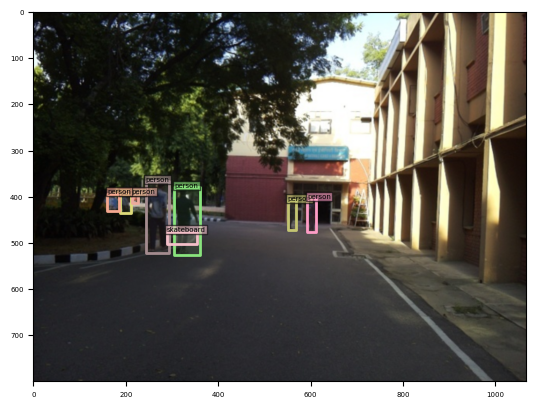

In [23]:
# visualize outputs
thershold = 0.3 # set a thershold

vslzr = COCOVisualizer()

scores = output['scores']
labels = output['labels']
boxes = box_ops.box_xyxy_to_cxcywh(output['boxes'])
select_mask = scores > thershold

box_label = [id2name[int(item)] for item in labels[select_mask]]
pred_dict = {
    'boxes': boxes[select_mask],
    'size': torch.Tensor([image.shape[1], image.shape[2]]),
    'box_label': box_label
}
vslzr.visualize(image, pred_dict, savedir=None, dpi=100)